#Name: Muhammad mm06369

In [ ]:
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
import en_core_web_sm
from collections import Counter
from spacy import displacy
import spacy
from nltk import pos_tag, word_tokenize, RegexpParser
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Q1

In [ ]:
def extractURL(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [ ]:
nlp = spacy.load('en_core_web_sm')
URL = 'https://blogs.lse.ac.uk/religionglobalsociety/2018/06/islam-and-human-rights-clash-or-compatibility/'
ny_bb = extractURL(URL)
article = nlp(ny_bb)
len(article.ents)

176

In [ ]:
labels = [x.label_ for x in article.ents]
items = [x.text for x in article.ents]
sentences = [x for x in article.sents]

In [ ]:
Counter(labels)

Counter({'ORG': 36,
         'GPE': 7,
         'PERSON': 21,
         'DATE': 26,
         'NORP': 63,
         'CARDINAL': 9,
         'TIME': 9,
         'EVENT': 2,
         'WORK_OF_ART': 2,
         'PRODUCT': 1})

In [ ]:
Counter(items).most_common(5)

[('Islamic', 30),
 ('Islam', 21),
 ('Muslim', 12),
 ('Marie Juul Petersen', 5),
 ('2018', 4)]

In [ ]:
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')

In [ ]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])

{'Islam': 'ORG'}

In [ ]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[0])) if not y.is_stop and y.pos_ != 'PUNCT']]

[(' ', 'SPACE', ' '),
 ('Islam', 'PROPN', 'Islam'),
 ('human', 'ADJ', 'human'),
 ('rights', 'NOUN', 'right'),
 ('Clash', 'VERB', 'clash'),
 ('compatibility', 'NOUN', 'compatibility')]

In [ ]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

### Analysis:

On a piece of writing about Islam and its views on human rights, I conducted NER analysis. Using displaCy, the NER visualisation aided in the formation and classification of terms under entities. It came as no surprise that NORP, a religious or political organization, was one of the most significant (frequent) entities in the article. It surprised me, though, that ORG was also taking the initiative. Upon closer inspection, I discovered that the NER analysis wasn't quite accurate as it occasionally classified Islam as ORG and other keywords related to Islam as NORP. A number of other words, including "Mawdudi," were incorrectly highlighted as ORG. While this is a good way to get a glimpse at the major entities that form up a piece of text, this is not the best way to analyse it as it has shortcomings of wrongly identifying words.

## Q2

In [ ]:
!pip install tika

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32641 sha256=ad4d5370ea100e5ffb07e34f12b3a835966e3b5370b4faf7c15c1485a1852255
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [ ]:
import tika
tika.initVM()
from tika import parser
raw = parser.from_file("SNA.pdf")

2023-04-30 21:22:49,138 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-04-30 21:22:49,508 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2023-04-30 21:22:49,982 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [ ]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et",
                 "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower()
                not in stopwords]
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
filtered_word_freq = nltk.FreqDist(clean_words)

In [ ]:
filtered_word_freq.most_common(20)

[('network', 40),
 ('standing', 38),
 ('committees', 22),
 ('Network', 21),
 ('committee', 20),
 ('National', 19),
 ('Assembly', 18),
 ('Standing', 14),
 ('nodes', 12),
 ('part', 12),
 ('important', 11),
 ('Committees', 10),
 ('Pakistan', 10),
 ('connections', 10),
 ('networks', 10),
 ('political', 10),
 ('party', 10),
 ('properties', 9),
 ('Erdos-Renyi', 9),
 ('Watts-Strogatz', 9)]

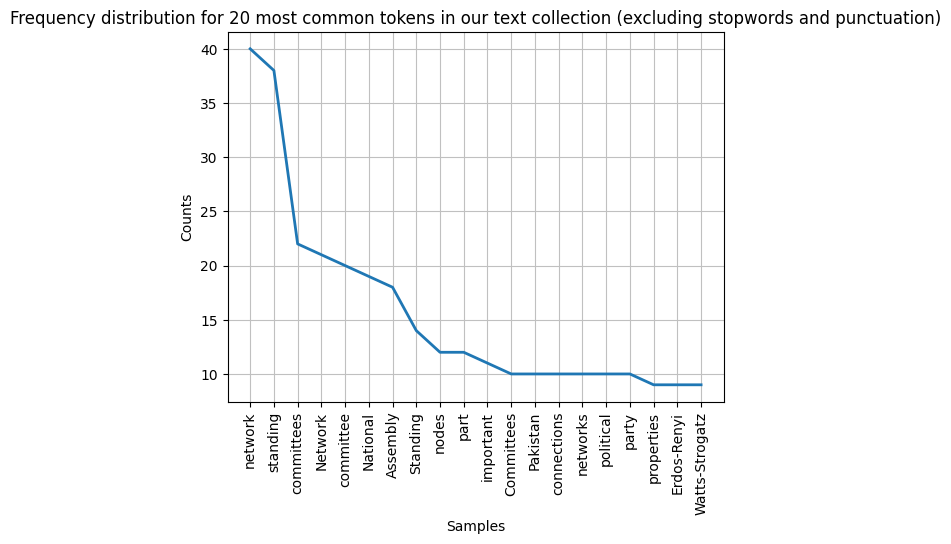

<Axes: title={'center': 'Frequency distribution for 20 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
filtered_word_freq.plot(20, title='Frequency distribution for 20 most common tokens in our text collection (excluding stopwords and punctuation)')

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

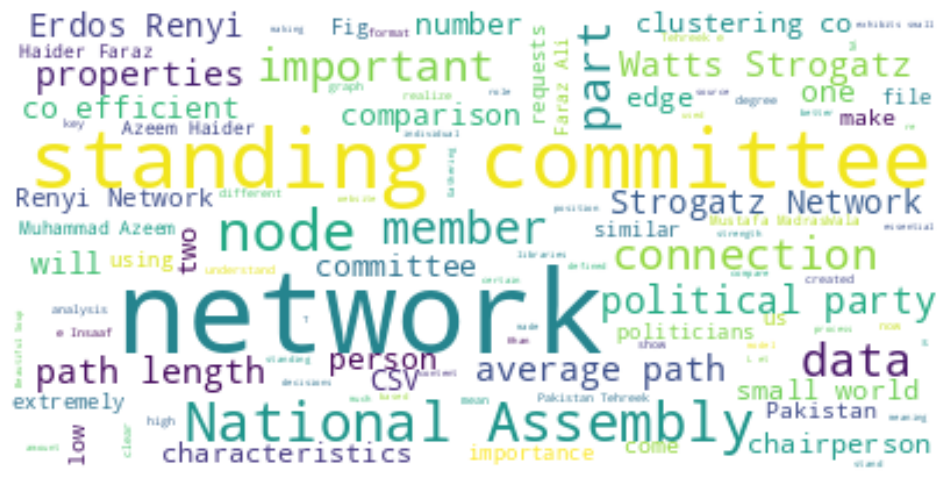

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

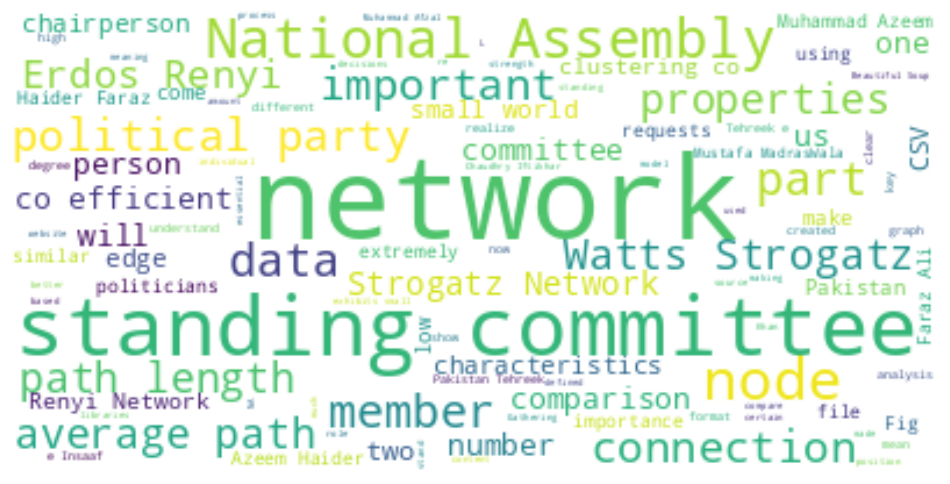

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50,
                      max_words=100, background_color="white").generate(raw['content'])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
!pip install rake_nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(80.76153846153848,
  '2820459 maximum degree 258 minimum degree 38 average path length 1'),
 (34.54070620928029,
  'standing committee network nodes 294 edges 12148 density 0'),
 (27.71944444444444, 'small world 6 muhammad azeem haider'),
 (27.48333333333333, 'muhammad afzal 4 muhammad azeem haider'),
 (27.117924528301884, 'standing committee ” defense production ”.'),
 (26.85, 'extracting useful data using htm5 tags'),
 (26.469277637851718,
  'standing committee network exhibits small world characteristics'),
 (24.474999999999998, 'national assembly 2018 muhammad azeem haider'),
 (24.033333333333335, 'networks show small average path length'),
 (23.370828079024797, 'renyi network average path length 1')]

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(raw['content'])
print(doc2.ents)

(Standing Committees - National Assembly 2018, Muhammad Azeem Haider, Faraz Ali, Mustafa, Habib University, Karachi, Pakistan, the National Assembly of 2018, National
Assembly, 36, Pakistan, two, Erdos-Renyi, Watts Strogatz, 2, Pakistan, the National Assembly, Pakistan, first, Standing Committees, Senate, the Standing Committees of the House, Committees, Parliament, the National Assembly’s, the Standing Committees, Ministry, the standing committee network, 2, Muhammad Azeem Haider, Faraz Ali, Mustafa, 3, Materials and Methods, 3.1, the National Assembly’s, 3.2, Data Gathering, Beautiful Soup, 1, 2, html5, 3, R., 4, CSV, Data Gathering, Beautiful Soup, CSV, Firstly, CSV, CSV, 1, 4, 294, 12148, 0.4346553, two, the National Assembly, one, more than one, more than one, Standing Committees - National Assembly, 2018 3, one, the National
Assembly, 2018-2023, one, one, 5, 5.1, Network, National Assembly, Fig, 1, 294, Muhammad Afzal Khan Dhandla, NA-98, Pakistan, Tehreek, PTI, 258, the Standing

In [ ]:
!pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.4 MB/s eta 0:00:00


In [ ]:
import yake

In [ ]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(
    lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Standing Committees', 0.0009927963308519342)
('National Assembly', 0.0019527401868890655)
('network', 0.0025934649807764247)
('committee network', 0.002835173496634057)
('Standing', 0.0033572667366786085)
('Committees', 0.0049149518778534755)
('committee', 0.006049171541973508)
('Habib University', 0.006070863959297868)
('National', 0.008309080543329716)
('Assembly', 0.009667127888690674)
('Watts-Strogatz Network', 0.01141850608646912)
('Erdos-Renyi Network', 0.01474768572904721)
('networks', 0.01582013638273619)
('nodes', 0.018994504894316172)
('Path Length', 0.02311842936465472)
('Muhammad Azeem', 0.024460733826411944)
('Average Path', 0.025870318509808057)
('Pakistan', 0.026418637091779343)
('Political Party', 0.026922537008182854)
('Faraz Ali', 0.028613393157130237)


### Analysis:

For this section, several analyses were conducted. First, I plotted the frequency of the words that appeared most frequently in the paper using a basic version of Matplotlib. The frequency graph appropriately highlighted the most significant and frequently used terms in the paper, which was titled Social Network Analysis of Pakistani Politics. But there was one flaw in this approach that I found. Committee and committees are two words that convey the same information, but they were treated as separate words when they should have been combined.

Plotting the word cloud was the next step I took, and it produced some surprisingly good results as well. It was a good visual way to highlight the key words and did an excellent job of identifying the important keywords from the paper.

Yake and Rake were the other two libraries I used. They are both libraries for automatic keyword extraction. Rake's output wasn't very valuable, but the keywords he highlighted were definitely worth it. It performed an excellent job of locating keywords like National Assembly and Standing Committees from the paper. provides a summary of the paper's topic for the user. The flaw persisted, though, since committees and committees were emphasized as two distinct keywords. This results in redundant keywords.

## Q3

In [ ]:
import tweepy as tw
import json
import pandas as pd
from textblob import TextBlob

In [ ]:
# Part-1: Authorization and Search tweets
# Getting authorization
auth = tw.OAuth2BearerHandler(
    'AAAAAAAAAAAAAAAAAAAAAM6CnAEAAAAAg3jcrw7guJg1MWNZ6avdp1hP2sk%3DMLBlokDJlF6H7yNGQ5OrS5WWT0Yqb16rvADj9pvYXLhQq2gwhz')
api = tw.API(auth)

In [ ]:
# Create a custom search term and define the number of tweets
search_term = " #letsconnect -filter:retweets"
tweets = tw.Cursor(api.search_tweets,
                   q=search_term + 'since:2023-05-01',
                   lang="en").items(100)

In [ ]:
searched_tweets = [t for t in tweets]
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
with open('tweet_json_letsconnect.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

my_demo_list = []
with open('tweet_json_letsconnect.txt', encoding='utf-8') as json_file:
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })

        tweet_dataset = pd.DataFrame(my_demo_list, columns =
                                  ['tweet_id', 'text',
                                   'favorite_count', 'retweet_count',
                                   'created_at'])

#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_letsconnect.csv',index=False)

In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
tweet_dataset['text'] = np.vectorize(remove_url)(tweet_dataset['text'])
tweet_dataset['text'] = np.vectorize(
    remove_pattern)(tweet_dataset['text'], "@[\w]*")
tweet_dataset.to_csv('cleaned_letsconnect.csv',index=False)
tweet_dataset = pd.read_csv('cleaned_letsconnect.csv')

In [ ]:
def tweet_sentiment(txt):
    analysis = TextBlob(txt)
    if analysis.sentiment[0] >= 0:
       res = 'positive'
    else:
       res = 'negative'
    return (res)

In [ ]:
tweet_dataset['sentiment'] = np.vectorize(
    tweet_sentiment)(tweet_dataset['text'])

In [ ]:
tweet_dataset['sentiment'].value_counts()

positive    90
negative    10
Name: sentiment, dtype: int64

In [ ]:
tweet_dataset[tweet_dataset['sentiment'] == 'positive']['text'].head()

0    RT ighostwrite Hi WritingCommmunity Here is my...
1    Without ambition one starts nothing Without wo...
2    No Work is insignificant All labor that uplift...
3    tweeter Fresh clean and likenew Our area rug c...
4    Unleash your creative potential and letsconnec...
Name: text, dtype: object

In [ ]:
tweet_dataset[tweet_dataset['sentiment'] == 'negative']['text'].head()

24    My toxic trait is networking everyone i f with...
28    Teaser How To Apply Responsive Dark Mode In Yo...
38    How To Apply Responsive Dark Mode In Your Webs...
41    RT mansoor91 AssalamualaikumGood MorningSucces...
43    AssalamualaikumGood MorningSuccess is not just...
Name: text, dtype: object

In [ ]:
max_retweets_tweet = tweet_dataset.loc[tweet_dataset['retweet_count'].idxmax()]
max_retweets_tweet['sentiment'] = np.vectorize(
    tweet_sentiment)(max_retweets_tweet['text'])
max_retweets_tweet

<ipython-input-47-8d5e2863e94f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_retweets_tweet['sentiment'] = np.vectorize(


tweet_id                                        1652405396362121216
text              RT beinggurudotcom The Power of AI Build a 100...
favorite_count                                                    0
retweet_count                                                    23
created_at                           Sat Apr 29 20:12:01 +0000 2023
sentiment                                                  positive
Name: 55, dtype: object

In [ ]:
max_retweets_tweet['text']

'RT beinggurudotcom The Power of AI Build a 100 free website in 10 minutes Get your presence online today l'

In [ ]:
# plotting total number of positive, negative and neutral tweets over time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objs as go
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# convert the 'Datetime' column to datetime format
tweet_dataset['created_at'] = pd.to_datetime(tweet_dataset['created_at'])

# group the data by date and sentiment, and count the number of tweets in each group
grouped_data = tweet_dataset.groupby(
    ['created_at', 'sentiment']).size().reset_index(name='count')

# pivot the table to create a separate column for each sentiment
pivot_table = pd.pivot_table(grouped_data, values='count', index=[
                             'created_at'], columns=['sentiment'], fill_value=0)

# create a timeline visualization plot
timeline_fig = go.Figure()
timeline_fig.add_trace(go.Scatter(
    x=pivot_table.index, y=pivot_table['positive'], name='positive', line=dict(color='green')))
timeline_fig.add_trace(go.Scatter(
    x=pivot_table.index, y=pivot_table['negative'], name='negative', line=dict(color='red')))
timeline_fig.update_layout(
    title='Timeline of Positive and Negative Sentiments', xaxis_title='Date', yaxis_title='Count')

# show the plot
timeline_fig.show()

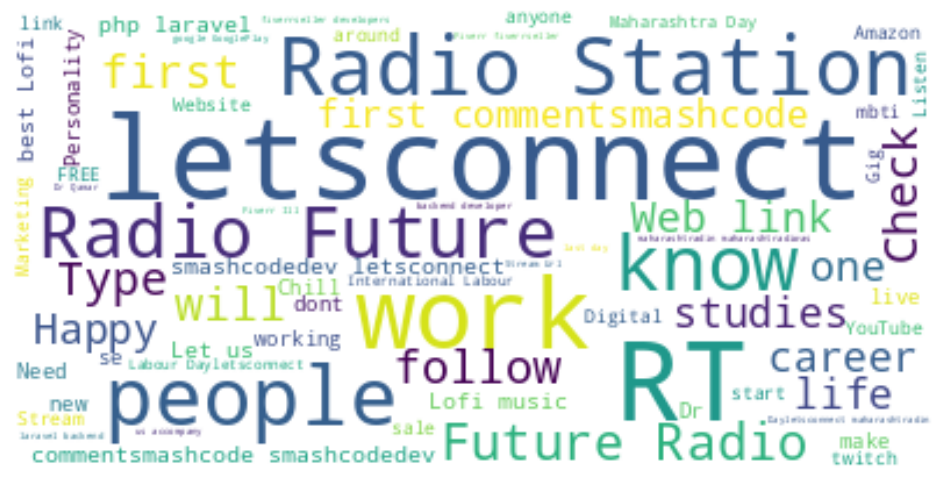

In [ ]:
corpus = ' '.join(tweet_dataset.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50,
                      max_words=100, background_color="white").generate(corpus)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analysis:

In order to complete this section, I took the tweets from a popular hashtag used by Pakistan's freelance community. #let's connect. Newcomers frequently use this hashtag to introduce themselves, provide more information about their services, and support the development of a positive freelance community in Pakistan. Because this is a positive topic, it makes sense that 90% of the tweets under this hashtag were classified as positive and the remaining 10% as negative, according to my sentiment analysis. Positive sentiment-filled tweets contained terms like "potential," "work," "community," "ambition," and "labor."

Conversely, those who expressed negativity used terms like "dark," "teaser," and "toxic."

The tweet with the most retweets was positive and discussed using AI to create a free website. The person who originated this specific hashtag, beinggurudotcom, also retweeted this message.

Over time, tweets with positive sentiment have consistently outnumbered those with negative sentiment.
